In [97]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [98]:
v_NaOH_list = [0, 0.005, 0.010, 0.015, 0.018, 0.020, 0.022, 0.025, 0.030, 0.035, 0.040]

def calc_values(c_HCl = 0.1, v_HCl = 0.02, c_NaOH = 0.1, v_NaOH = v_NaOH_list):
    n_HCl =  c_HCl * v_HCl
    pH_list = []
    for v in v_NaOH:
        new_n_NaOH = c_NaOH * v
        v_ges = v_HCl + v

        if n_HCl > new_n_NaOH:
            new_n_HCl = n_HCl - new_n_NaOH

            c_ges = new_n_HCl / v_ges

            pH = -math.log10(c_ges)

        elif n_HCl < new_n_NaOH:
            new_n_NaOH = new_n_NaOH - n_HCl

            c_ges = new_n_NaOH / v_ges

            pOH = -math.log10(c_ges)

            pH = 14 - pOH

        else:
            # pH = (pKs(H2O) - math.log10(n(H2O))) / 2
            pH = (15.74 - math.log10(1000 / 18)) / 2


        pH_list.append(pH)
        
    return pH_list

In [99]:
def show_plot(*args, **kwargs):
    fig, ax = plt.subplots()
    ax.set_ylim([-1, 15]) 
    y_ticks = np.arange(-1, 15, 1)
    ax.set_yticks(y_ticks)

    for x, y in args:
        ax.plot(x, y, **kwargs, linestyle='--', marker='o')

    plt.show()

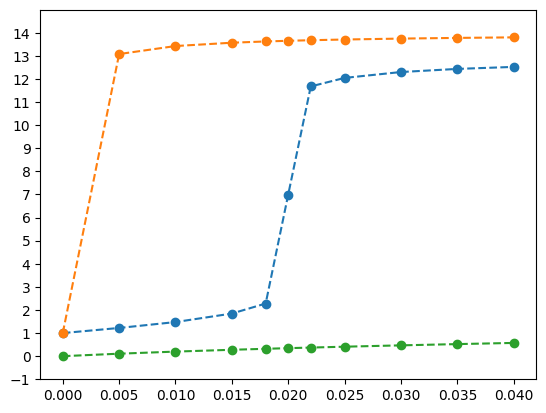

In [100]:
show_plot((v_NaOH_list, calc_values()), (v_NaOH_list, calc_values(0.1, 0.02, 1)), (v_NaOH_list, calc_values(1, 0.02, 0.1)))